In [1]:
import numpy as np
import pandas as pd

from bokeh.plotting import figure,show,output_notebook
from bokeh.models import Range1d

from sklearn import datasets
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split 

output_notebook()
%matplotlib inline
import statsmodels.api as sm

Loading BokehJS ...

/Users/kabirnigam/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/kabirnigam/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [87]:
df = pd.read_csv('train.csv')

In [148]:
df.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [89]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

### Age, Cabin and Embarked are the columns with null values

# AGE CLEANUP

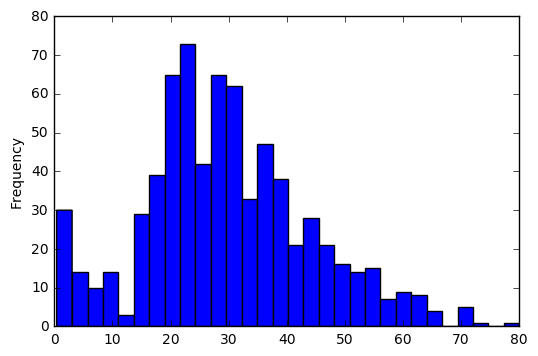

In [90]:
df[df['Age'].isnull() == False]['Age'].plot(kind='hist', bins=30)

/Users/kabirnigam/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


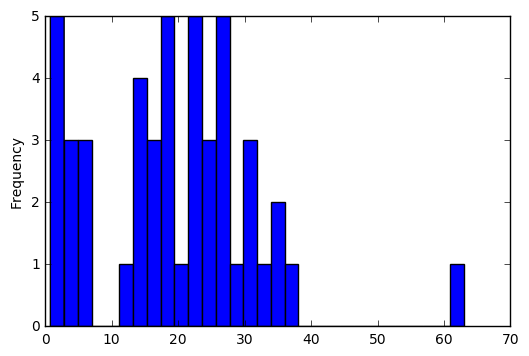

In [143]:
df[df['Age'].isnull() == False][df['Sex'] == 'female'][df['Pclass'] == 3][df['Survived'] == 1]['Age'].plot(kind='hist', bins=30)

In [150]:
male_age_survived_1 = df[df['Age'].isnull() == False][df['Sex'] == 'male'][df['Pclass'] == 1][df['Survived'] == 1]['Age'].median()
age_filled = df[df['Sex'] == 'male'][df['Pclass'] == 1]['Age'][df['Survived'] == 1].fillna(male_age_survived_1)

/Users/kabirnigam/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/Users/kabirnigam/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


In [152]:
male_age_survived_2 = df[df['Age'].isnull() == False][df['Sex'] == 'male'][df['Pclass'] == 2][df['Survived'] == 1]['Age'].median()
age_filled = pd.concat([age_filled, df[df['Sex'] == 'male'][df['Pclass'] == 2][df['Survived'] == 1]['Age'].fillna(male_age_survived_2)])

/Users/kabirnigam/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/Users/kabirnigam/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


In [161]:
len(age_filled)

270

In [154]:
male_age_survived_3 = df[df['Age'].isnull() == False][df['Sex'] == 'male'][df['Pclass'] == 3][df['Survived'] == 1]['Age'].median()
age_filled = pd.concat([age_filled, df[df['Sex'] == 'male'][df['Pclass'] == 3][df['Survived'] == 1]['Age'].fillna(male_age_survived_3)])

/Users/kabirnigam/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/Users/kabirnigam/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


In [156]:
df[df['Age'].isnull() == False][df['Sex'] == 'female'][df['Pclass'] == 3][df['Survived'] == 1]['Age'].mean()

/Users/kabirnigam/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


19.329787234042552

In [158]:
female_age_survived_1 = df[df['Age'].isnull() == False][df['Sex'] == 'female'][df['Pclass'] == 1][df['Survived'] == 1]['Age'].median()
age_filled = pd.concat([age_filled, df[df['Sex'] == 'female'][df['Pclass'] == 1]['Age'][df['Survived'] == 1].fillna(female_age_survived_1)])

/Users/kabirnigam/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/Users/kabirnigam/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


In [160]:
female_age_survived_2 = df[df['Age'].isnull() == False][df['Sex'] == 'female'][df['Pclass'] == 2][df['Survived'] == 1]['Age'].median()
age_filled = pd.concat([age_filled, df[df['Sex'] == 'female'][df['Pclass'] == 2]['Age'][df['Survived'] == 1].fillna(female_age_survived_2)])

/Users/kabirnigam/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/Users/kabirnigam/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


In [162]:
female_age_survived_3 = df[df['Age'].isnull() == False][df['Sex'] == 'female'][df['Pclass'] == 3][df['Survived'] == 1]['Age'].median()
age_filled = pd.concat([age_filled, df[df['Sex'] == 'female'][df['Pclass'] == 3]['Age'][df['Survived'] == 1].fillna(female_age_survived_3)])

/Users/kabirnigam/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/Users/kabirnigam/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


In [164]:
age_filled

23     28.00
55     36.00
97     23.00
187    45.00
209    40.00
224    38.00
248    37.00
298    36.00
305     0.92
370    25.00
390    36.00
430    28.00
445     4.00
447    34.00
449    52.00
453    49.00
460    48.00
484    25.00
507    36.00
512    36.00
550    17.00
572    36.00
587    60.00
599    49.00
604    35.00
607    27.00
621    42.00
630    80.00
632    32.00
645    48.00
       ...  
368    19.00
376    22.00
381     1.00
394    24.00
431    19.00
448     5.00
469     0.75
479     2.00
483    63.00
533    19.00
554    22.00
559    36.00
573    19.00
612    19.00
644     0.75
649    23.00
653    19.00
677    18.00
691     4.00
697    19.00
727    19.00
777     5.00
780    13.00
786    18.00
797    31.00
823    27.00
830    15.00
855    18.00
858    24.00
875    15.00
Name: Age, dtype: float64

In [76]:
df[df['Age'].isnull() == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C


28.0

/Users/kabirnigam/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


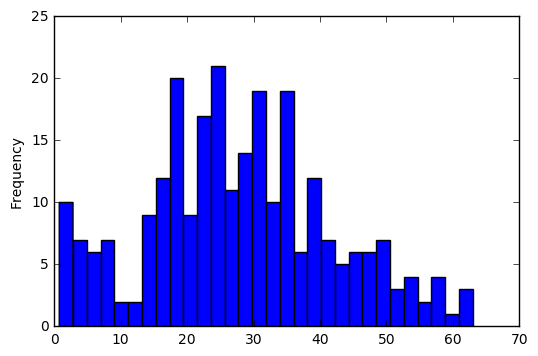

In [35]:
df['Embarked']=df['Embarked'].fillna('S')

In [36]:
df['Fare'] = df.Fare.fillna(df.Fare.median())

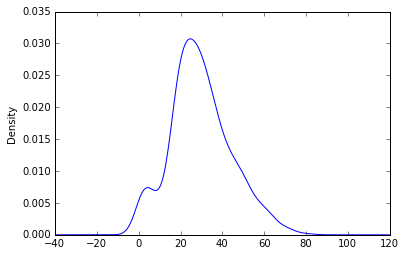

In [37]:
df['Age'].plot(kind='kde') #normal distibution, thus can fill with median

In [38]:

df['Age'] = df['Age'].fillna(df.Age.median())

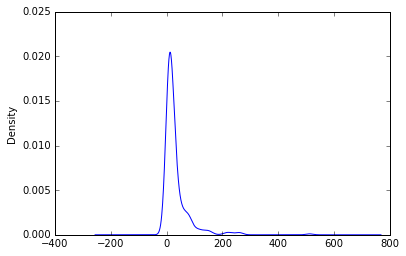

In [39]:
df['Fare'].plot(kind = 'kde')

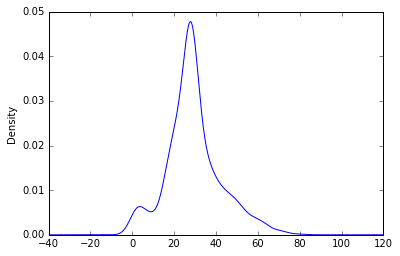

In [40]:
df['Age'].plot(kind='kde')

In [41]:
for i in range(len(df.Sex)):
    if df.Sex[i] == 'male':
        df.Sex[i] = 0
    else:
        df.Sex[i] = 1

/Users/kabnigam/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/kabnigam/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [42]:
for i in range(len(df.Embarked)):
    if df.Embarked[i] == 'S':
        df.Embarked[i] = 0
    elif df.Embarked[i] == 'C':
        df.Embarked[i] = 1
    else:
        df.Embarked[i] = 2

/Users/kabnigam/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/kabnigam/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/kabnigam/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [43]:
df.Embarked.values

array([0, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 2,
       0, 0, 0, 1, 0, 2, 0, 1, 1, 2, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 2, 0,
       2, 2, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1,
       0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 1, 1, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 2, 1, 0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0,
       0, 0, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 2,

In [44]:
df.Fare.values

array([   7.25  ,   71.2833,    7.925 ,   53.1   ,    8.05  ,    8.4583,
         51.8625,   21.075 ,   11.1333,   30.0708,   16.7   ,   26.55  ,
          8.05  ,   31.275 ,    7.8542,   16.    ,   29.125 ,   13.    ,
         18.    ,    7.225 ,   26.    ,   13.    ,    8.0292,   35.5   ,
         21.075 ,   31.3875,    7.225 ,  263.    ,    7.8792,    7.8958,
         27.7208,  146.5208,    7.75  ,   10.5   ,   82.1708,   52.    ,
          7.2292,    8.05  ,   18.    ,   11.2417,    9.475 ,   21.    ,
          7.8958,   41.5792,    7.8792,    8.05  ,   15.5   ,    7.75  ,
         21.6792,   17.8   ,   39.6875,    7.8   ,   76.7292,   26.    ,
         61.9792,   35.5   ,   10.5   ,    7.2292,   27.75  ,   46.9   ,
          7.2292,   80.    ,   83.475 ,   27.9   ,   27.7208,   15.2458,
         10.5   ,    8.1583,    7.925 ,    8.6625,   10.5   ,   46.9   ,
         73.5   ,   14.4542,   56.4958,    7.65  ,    7.8958,    8.05  ,
         29.    ,   12.475 ,    9.    ,    9.5   , 

In [45]:
features = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
target = ['Survived']

In [46]:
data = df[features]
outcome = df[target].values.ravel()
X_train, X_test, Y_train, Y_test = train_test_split(data, outcome, test_size=0.2, random_state=1)

In [47]:
from __future__ import division
c = [.01,.05,.07,.09,.1,.11,.12,.15,.17,.2,.3,.5,1,5,10,200]
score = []
for i in range(1,100):
    model_lr = LogisticRegression(C=(i/100)).fit(X_train, Y_train)
    score.append(cross_val_score(model_lr, data, outcome, cv=3).mean())
p = figure(title = 'CV Score for Various Regularization Parameters')
p.scatter(range(1,100),score)
show(p) #c = .08 yields the higest result


In [48]:
score = []
for i in range(1,100):
    model_lr = LogisticRegression(C=(i)).fit(X_train, Y_train)
    score.append(cross_val_score(model_lr, data, outcome, cv=3).mean())
p3 = figure(title = 'CV Score for Various Regularization Parameters')
p3.scatter(range(1,100),score)
show(p3) #c = .08 yields the higest result


In [49]:
model_lr = LogisticRegression(C=.08).fit(X_train, Y_train)
cross_val_score(model_lr, data, outcome, cv=3).mean()


0.80022446689113347

In [50]:
scores = []
for i in range(2,100):
    scores.append(cross_val_score(model_lr, data, outcome, cv=i).mean())
p2=figure(title='CV Score vs. Folds')
p2.scatter(range(2,100),scores)
show(p2) #c=28 yields the best result

In [59]:
cross_val_score(model_lr, data, outcome, cv=28)

array([ 0.81818182,  0.84848485,  0.78787879,  0.75757576,  0.78787879,
        0.81818182,  0.8125    ,  0.75      ,  0.84375   ,  0.875     ,
        0.8125    ,  0.875     ,  0.6875    ,  0.84375   ,  0.8125    ,
        0.71875   ,  0.875     ,  0.70967742,  0.83870968,  0.74193548,
        0.77419355,  0.80645161,  0.87096774,  0.83870968,  0.83870968,
        0.77419355,  0.80645161,  0.87096774])

In [52]:
model_lr.coef_

array([[-0.59678664,  1.773458  , -0.01841347, -0.23586734,  0.07420045,
         0.00641455,  0.23994913]])

In [53]:
predictions = model_lr.predict(X_train)
predictions

array([0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1,

In [54]:
model_lr.densify()

LogisticRegression(C=0.08, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [55]:
p = figure(title='Logistic Regression Coefficients')
for val in range(len(features)):
    p.quad(top=model_lr.coef_.ravel()[val], 
           bottom=0, left=val+0.2,right=val+0.8, 
           color=['red','orange','green','purple','blue','yellow','pink'][val],
           legend=features[val]
          )
    
p.y_range = Range1d(min(model_lr.coef_.ravel())-0.1, max(model_lr.coef_.ravel())+1.5)
show(p)


In [56]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

def plot_roc_curve(target_test, target_predicted_proba):
    fpr, tpr, thresholds = roc_curve(target_test, target_predicted_proba[:, 1])
    
    roc_auc = auc(fpr, tpr)
    
    p = figure(title='Receiver Operating Characteristic')
    # Plot ROC curve
    p.line(x=fpr,y=tpr,legend='ROC curve (area = %0.3f)' % roc_auc)
    p.x_range=Range1d(0,1)
    p.y_range=Range1d(0,1)
    p.xaxis.axis_label='False Positive Rate or (1 - Specifity)'
    p.yaxis.axis_label='True Positive Rate or (Sensitivity)'
    p.legend.orientation = "bottom_right"
    show(p)
    


In [57]:
target_predicted_proba = model_lr.predict_proba(X_test)
plot_roc_curve(Y_test, target_predicted_proba)
roc_curve

<function sklearn.metrics.ranking.roc_curve>

In [62]:
roc_curve.func_defaults

(None, None)

In [58]:

rel = []

for i in range(len(df.Name)):

    if df.Parch[i] !=0 or df.SibSp[i] != 0:
        lastName = df.Name[i].split(',')
        if lastName[0] in df.Name[i]:
            rel.append(i)

cabin = []
for i in range(len(rel)):
    cabin.append(df.Cabin[rel[i]])   
    
#attempt to fill null cabin values by sibling/spouse/parent